

## Gather

In [279]:
#To load the twitter-archive-enhanced.csv file.
import pandas as pd
df_twit_arch =pd.read_csv("twitter-archive-enhanced.csv")

In [280]:
#To get the image-predictions.tsv file from url and loading into data frame.
import requests
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response =requests.get(url)
response

<Response [200]>

In [281]:
url.split('/')[-1]

'image-predictions.tsv'

In [282]:
with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

In [283]:
## To load the data from image-predictions.tsv file
import pandas as pd
df_img_prediction =pd.read_csv("image-predictions.tsv",sep='\t')

In [3]:
## i have hidden my access key. So it will fail if excuted it again.
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'My CONSUMER KEY'
consumer_secret = 'My CONSUMER SECRET'
access_token = 'My ACCESS TOKEN'
access_secret = 'My ACCESS SECRET'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twit_arch.tweet_id.values
len(tweet_ids)
#tweet_id = '891327558926688256'

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [284]:
import os
import pandas as pd
import json
# List of dictionaries to build file by file and later convert to a DataFrame
df_list = []
count =0
count1 =0
data ={}
with open('tweet_json.txt') as json_file:
 for json_line in json_file.readlines():
   count += 1
   # Same when deserializing
   data = json.loads(json_line)
   #Append to list of dictionaries
   df_list.append({'id' : data['id'],'retweet_count' : data['retweet_count'],'favorite_count' : data['favorite_count']})
 
df_retweet=pd.DataFrame(df_list,columns=['id','retweet_count','favorite_count'])

## Assess	


In [285]:
#verify the data structure.
df_retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [286]:
#verify the data structure
df_twit_arch.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [287]:
#verify the data structure
df_img_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [288]:
# To check if any false predict values is there in image predict file.
df_img_prediction.query("p1_dog==False and p2_dog ==False and p3_dog==False ")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [289]:
#duplicate checking
df_img_prediction.duplicated().value_counts()

False    2075
dtype: int64

In [290]:
df_retweet.duplicated().value_counts()

False    2342
dtype: int64

In [291]:
df_twit_arch.duplicated().value_counts()

False    2356
dtype: int64

In [292]:
df_twit_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [293]:
df_twit_arch.query("retweeted_status_id !='NaN'").shape


(181, 17)

In [294]:
# To check if any rating_numerator values less than denominator.
df_twit_arch.query("rating_numerator<rating_denominator")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6.0,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0.0,10,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11.0,15,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7.0,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7.0,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9.0,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here we see a rare pouched pupp...,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541...,8.0,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1.0,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5.0,10,None,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Hank. He's mischievous ...,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668...,8.0,10,Hank,None,None,None,None


In [295]:
df_img_prediction.query("tweet_id=='883482846933004288'")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True


In [296]:
##To check if any of the duplciate columns there in all the files.
all_columns = pd.Series(list(df_twit_arch) + list(df_img_prediction) + list(df_retweet))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [297]:
df_twit_arch[df_twit_arch.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [298]:
df_img_prediction[df_img_prediction.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [299]:
df_retweet[df_retweet.id.duplicated()]

,id,retweet_count,favorite_count


#### Quality
================

#### 1) The rating numerators are less than the denominators does need to be cleaned

#### 2)The tweet_id column should be named same in all the DataFrames and it's datatype should be same in all the tables

#### 3) The datatype of different columns should the reflective of the values present, like retweeted_status_timestamp, timestamp, etc.
####  4)We do not need to collect the tweets beyond August 1st, 2017
####  5) (in_reply_to_status_id, in_reply_to_user_id     
####    ,retweeted_status_id,retweeted_status_user_id is a int not a float

####  6) There are retweets present in the dataset (should be removed)
#### 7)The ratings are not extracted correctly especially decimals. 
#### 8The name column has many invalid values like , a, an, the.

####  9 ) timestamp name need to be renamed as "created_datetime"

#### 10) if (p1_dog and p2_dog and p3_dog) all of them are not TRUE then the records not valid to find the breed of dog which need to   be removed from this table.



#### Tidiness
=====================
####  1) four variables in four columns in `df_twit_arch` table like dog "stage" (i.e. doggo, floofer, pupper, and puppo) which can  combine into one column.

####  2) drop the doggo, floofer, pupper, and puppo column once dog_stage column is getting created.
####  3) Three Prediction variables in Three column in `df_img_prediction`  table like dog "breed_type"(i.e p1,p1_conf,p1_dog...)  which we can make into one column like "Dog_breed_type" based on high prediction values
####  4) drop the p1,p1_conf,p1_dog.. column once Dog_breed_type column is getting created.
####  5) Merge all the three dataframe tables into one Master dataframe.

## Copy dataset from original data 

In [300]:
df_twit_arch_clean = df_twit_arch.copy()
df_img_prediction_clean = df_img_prediction.copy()
df_retweet_clean = df_retweet.copy()

## Clean

### Quality issues

#### `df_twit_arch Table`: 1) the rating numerators are less than the denominators does need to be cleaned

##### Define
-copy the rows only which are matched the the rating numerators are greater than the denominators.

##### Code 

In [301]:
#df_twit_arch.query("tweet_id=='892420643555336193'")  -- Need to clean.
#df_twit_arch_clean=df_twit_arch_clean.query("rating_numerator>rating_denominator")
df_twit_arch_clean =df_twit_arch_clean[df_twit_arch_clean["rating_numerator"]>df_twit_arch_clean["rating_denominator"]]

##### Test

In [302]:
df_twit_arch_clean.query("rating_numerator<rating_denominator")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## 2)The tweet_id column should be named same in all the DataFrames and it's datatype should be same in all the tables

##### Define
-df_retweet_clean table Id column has to be rename to tweet id.



##### Code 

In [303]:
df_retweet_clean = df_retweet_clean.rename(columns={'id': 'tweet_id'})

##### Test

In [304]:
df_retweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB



## 3) The datatype of different columns should the reflective of the values present, like retweeted_status_timestamp, timestamp, etc

##### Define
#### `df_twit_arch Table`: timestamp,retweeted_status_timestamp is a Date not a string
- To use pandas to_datetime function to change the datatype format.

##### Code

In [305]:
#to use to_datetime function to change the datatype format.
df_twit_arch_clean["timestamp"] =pd.to_datetime(df_twit_arch_clean['timestamp'])
df_twit_arch_clean['retweeted_status_timestamp'] = pd.to_datetime(df_twit_arch_clean['retweeted_status_timestamp'])



##### Test

In [306]:
df_twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 2339
Data columns (total 17 columns):
tweet_id                      1452 non-null int64
in_reply_to_status_id         59 non-null float64
in_reply_to_user_id           59 non-null float64
timestamp                     1452 non-null datetime64[ns]
source                        1452 non-null object
text                          1452 non-null object
retweeted_status_id           153 non-null float64
retweeted_status_user_id      153 non-null float64
retweeted_status_timestamp    153 non-null datetime64[ns]
expanded_urls                 1410 non-null object
rating_numerator              1452 non-null float64
rating_denominator            1452 non-null int64
name                          1452 non-null object
doggo                         1452 non-null object
floofer                       1452 non-null object
pupper                        1452 non-null object
puppo                         1452 non-null object
dtypes: dateti

#### `df_twit_arch Table`: 4) The ratings are not extracted correctly especially decimals.

##### Define
-We have to be corrected the data into CSV file visualy and extract to dataframe.

##### Code-= The invalid data has been corrected into CSV file itself visually

##### Test

In [307]:
#df_twit_arch_clean.query('rating_numerator==13.5')
df_twit_arch_clean.query('tweet_id==883482846933004288').rating_numerator
#df_twit_arch_clean.shape

45    13.5
Name: rating_numerator, dtype: float64

#### `df_twit_arch Table`: 5) The name column has many invalid values like , a, an, the.

##### Define
-To use pytnon Replace function to replace the  invalid values like , a, an, the.

##### Code

In [308]:
#df_twit_arch_clean.query("name=='a'")
twt_names= df_twit_arch_clean[['tweet_id', 'name']]
twt_names = twt_names.rename(columns={'name': 'Dog_Name'})
twt_names.Dog_Name = twt_names.Dog_Name.str.replace('a','None').replace('an','None').replace('the','None')
df_twit_arch_clean = pd.merge(df_twit_arch_clean, twt_names, on=['tweet_id', 'tweet_id'])
df_twit_arch_clean = df_twit_arch_clean.drop(['name'], axis=1)



##### Test

In [309]:
df_twit_arch_clean.Dog_Name.isin(['a','an','the']).value_counts()

False    1452
Name: Dog_Name, dtype: int64

#### `df_twit_arch Table`: 6) Rename timestamp to created_datetime 

##### Define
-To use pandas rename function to change the column name.

##### Code

In [310]:
#to use to_datetime function to change the datatype format.
df_twit_arch_clean = df_twit_arch_clean.rename(columns={'timestamp': 'created_datetime'})

##### Test

In [311]:
df_twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1451
Data columns (total 17 columns):
tweet_id                      1452 non-null int64
in_reply_to_status_id         59 non-null float64
in_reply_to_user_id           59 non-null float64
created_datetime              1452 non-null datetime64[ns]
source                        1452 non-null object
text                          1452 non-null object
retweeted_status_id           153 non-null float64
retweeted_status_user_id      153 non-null float64
retweeted_status_timestamp    153 non-null datetime64[ns]
expanded_urls                 1410 non-null object
rating_numerator              1452 non-null float64
rating_denominator            1452 non-null int64
doggo                         1452 non-null object
floofer                       1452 non-null object
pupper                        1452 non-null object
puppo                         1452 non-null object
Dog_Name                      1452 non-null object
dtypes: dateti

#### `df_twit_arch Table`:7)  we do not need to collect the tweets beyond August 1st, 2017

##### Define
-copy the rows only which are matched tweets timestamp beyond August 1st, 2017.

##### Code

In [312]:
#df_twit_arch_clean.query('timestamp >2017-08-01')
df_twit_arch_clean=df_twit_arch_clean[(df_twit_arch_clean['created_datetime'] < '2017-08-01')]

##### Test

In [313]:
df_twit_arch_clean[(df_twit_arch_clean['created_datetime'] > '2017-08-01')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,created_datetime,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,Dog_Name


#### `df_twit_arch Table`: 8) datatype issue 

- in_reply_to_status_id  is a int not a float
- in_reply_to_user_id  is a int not a float
- retweeted_status_id  is a int not a float
- retweeted_status_user_id  is a int not a float

##### Define
-if NAN values there then we can not convert. So we need to fill as 0 if it is null after that we can convert the datatype to In

##### Code

In [314]:
#to use astype function to change the int format.

df_twit_arch_clean['in_reply_to_status_id']=df_twit_arch_clean['in_reply_to_status_id'].fillna(0)
df_twit_arch_clean['in_reply_to_status_id']=df_twit_arch_clean['in_reply_to_status_id'].astype(int)   

df_twit_arch_clean['in_reply_to_user_id']=df_twit_arch_clean['in_reply_to_user_id'].fillna(0)
df_twit_arch_clean['in_reply_to_user_id']=df_twit_arch_clean['in_reply_to_user_id'].astype(int)  

df_twit_arch_clean['retweeted_status_id']=df_twit_arch_clean['retweeted_status_id'].fillna(0)
df_twit_arch_clean['retweeted_status_id']=df_twit_arch_clean['retweeted_status_id'].astype(int)  


df_twit_arch_clean['retweeted_status_user_id']=df_twit_arch_clean['retweeted_status_user_id'].fillna(0)
df_twit_arch_clean['retweeted_status_user_id']=df_twit_arch_clean['retweeted_status_user_id'].astype(int)  


##### Test

In [315]:
df_twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 2 to 1451
Data columns (total 17 columns):
tweet_id                      1450 non-null int64
in_reply_to_status_id         1450 non-null int64
in_reply_to_user_id           1450 non-null int64
created_datetime              1450 non-null datetime64[ns]
source                        1450 non-null object
text                          1450 non-null object
retweeted_status_id           1450 non-null int64
retweeted_status_user_id      1450 non-null int64
retweeted_status_timestamp    153 non-null datetime64[ns]
expanded_urls                 1408 non-null object
rating_numerator              1450 non-null float64
rating_denominator            1450 non-null int64
doggo                         1450 non-null object
floofer                       1450 non-null object
pupper                        1450 non-null object
puppo                         1450 non-null object
Dog_Name                      1450 non-null object
dtypes: datetime

#### `df_twit_arch Table`:9) There are retweets present in the dataset (should be removed)

##### Define
-There are 181 re-tweet record is there in df_twit_arch Table .We need to clean them.

##### Code

In [316]:
df_twit_arch_clean=df_twit_arch_clean[df_twit_arch_clean["retweeted_status_user_id"]==0]
#df_twit_arch_clean.info()



##### Test

In [317]:
df_twit_arch_clean[df_twit_arch_clean["retweeted_status_user_id"]!=0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,created_datetime,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,Dog_Name


##### `Image Predictions File` table
- 10) if (p1_dog and p2_dog and p3_dog) all of them are not TRUE then the records not valid to find the breed of dog which need to   be removed from this table.


##### Define
-To filter the false prediction from image prediction table.

##### Code

In [318]:
#df_img_prediction.query("p1_dog==False and p2_dog ==False and p3_dog==False ").shape  --324
#df_img_prediction.shape  -2075
df_img_prediction_clean=df_img_prediction_clean.query("p1_dog==True or p2_dog ==True or p3_dog==True ")

##### Test

In [319]:
df_img_prediction_clean.query("p1_dog==False and p2_dog ==False and p3_dog==False ").shape

(0, 12)

### Tidiness

#### `df_twit_arch Table`: issue 1 & 2

- four variables in four columns in `df_twit_arch` table like dog "stage" (i.e. doggo, floofer, pupper, and puppo) which can 
   combine into one column.
- drop the doggo, floofer, pupper, and puppo column once dog_stage column is getting created.

##### Define
- We can not do Melt if we have None values all four columns. so i have decided to have two separate data records like 
  df_twit_arch_clean_cut1,df_twit_arch_clean_cut2 and Melt all together.

##### Code

In [320]:
##Old Method Code
#df_twit_arch_clean_cut1=df_twit_arch_clean.query("pupper =='None' and doggo =='None' and puppo =='None' and  floofer =='None'")
#df_twit_arch_clean_cut2=df_twit_arch_clean.query("pupper !='None' or doggo !='None' or puppo !='None' or  floofer !='None'")

#df_twit_arch_clean_cut2=pd.melt(df_twit_arch_clean_cut2, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'created_datetime', 'source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','Dog_Name'],
 #                          var_name='dog_stage' ,value_name='dog_stage_value')
#df_twit_arch_clean_cut2 = df_twit_arch_clean_cut2[df_twit_arch_clean_cut2.dog_stage_value != "None"]
#df_twit_arch_clean_cut2 = df_twit_arch_clean_cut2.drop('dog_stage_value', axis=1)
#df_twit_arch_clean_cut1 = df_twit_arch_clean_cut1.drop(['pupper','doggo','puppo','floofer'], axis=1)

#concatinate both the dataframe.
#df_twit_arch_clean = pd.concat([df_twit_arch_clean_cut1, df_twit_arch_clean_cut2],
 #                            ignore_index=True)

In [321]:
##-New implementation as per Mentor advise.
twt_stage= df_twit_arch_clean[['tweet_id', 'pupper','doggo','puppo','floofer']]
twt_stage["dog_stage"] = twt_stage.pupper+','+twt_stage.doggo+','+twt_stage.puppo+','+twt_stage.floofer
twt_stage.dog_stage=twt_stage.dog_stage.str.replace('None,','').replace('None','')
twt_stage.dog_stage=twt_stage.dog_stage.str.replace(',None','').replace("",'None')
twt_stage.dog_stage.unique()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'pupper,doggo'], dtype=object)

In [322]:
twt_stage = twt_stage.drop(['pupper','doggo','puppo','floofer'], axis=1)
df_twit_arch_clean = pd.merge(df_twit_arch_clean, twt_stage, on=['tweet_id', 'tweet_id'])
df_twit_arch_clean = df_twit_arch_clean.drop(['pupper','doggo','puppo','floofer'], axis=1)

##### Test

In [323]:
df_twit_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 14 columns):
tweet_id                      1297 non-null int64
in_reply_to_status_id         1297 non-null int64
in_reply_to_user_id           1297 non-null int64
created_datetime              1297 non-null datetime64[ns]
source                        1297 non-null object
text                          1297 non-null object
retweeted_status_id           1297 non-null int64
retweeted_status_user_id      1297 non-null int64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1256 non-null object
rating_numerator              1297 non-null float64
rating_denominator            1297 non-null int64
Dog_Name                      1297 non-null object
dog_stage                     1297 non-null object
dtypes: datetime64[ns](2), float64(1), int64(6), object(5)
memory usage: 152.0+ KB


In [324]:
df_twit_arch_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,created_datetime,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,Dog_Name,dog_stage
773,738537504001953792,0,0,2016-06-03 01:07:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,0,0,NaT,https://twitter.com/dog_rates/status/738537504...,11.0,10,BNoneyley,puppo
1031,687818504314159109,0,0,2016-01-15 02:08:05,"<a href=""http://twitter.com/download/iphone"" r...",With great pupper comes great responsibility. ...,0,0,NaT,https://twitter.com/dog_rates/status/687818504...,12.0,10,None,pupper
94,871762521631449091,0,0,2017-06-05 16:15:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Rover. As part of pupper protocol he h...,0,0,NaT,https://twitter.com/dog_rates/status/871762521...,12.0,10,Rover,pupper
1171,674793399141146624,671729906628341760,4196983835,2015-12-10 03:30:58,"<a href=""http://twitter.com/download/iphone"" r...",I have found another. 13/10 https://t.co/HwroP...,0,0,NaT,https://twitter.com/dog_rates/status/674793399...,13.0,10,None,None
1071,684147889187209216,0,0,2016-01-04 23:02:22,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Sweets the English Bulldog. Waves back...,0,0,NaT,https://vine.co/v/ib2nTOEuuOI,12.0,10,Sweets,pupper
63,879050749262655488,0,0,2017-06-25 18:56:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Steven. He has trouble relating to oth...,0,0,NaT,https://twitter.com/dog_rates/status/879050749...,11.0,10,Steven,None
173,852912242202992640,0,0,2017-04-14 15:51:39,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benny. He likes being adorable and making...,0,0,NaT,"https://www.gofundme.com/bennys-medical-bills,...",12.0,10,Benny,None
272,832682457690300417,0,0,2017-02-17 20:05:43,"<a href=""http://twitter.com/download/iphone"" r...",Prosperous good boy 13/10 socioeconomic af htt...,0,0,NaT,https://twitter.com/telegraph/status/832268302...,13.0,10,None,None
375,816816676327063552,0,0,2017-01-05 01:20:46,"<a href=""http://twitter.com/download/iphone"" r...",This is Timber. He misses Christmas. Specifica...,0,0,NaT,https://twitter.com/dog_rates/status/816816676...,12.0,10,Timber,None
494,793286476301799424,0,0,2016-11-01 03:00:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Moreton. He's the Good Boy Who Lived. ...,0,0,NaT,https://twitter.com/dog_rates/status/793286476...,13.0,10,Moreton,None


#### `df_twit_arch Table`: issue 3 & 4
Three Prediction variables in Three column in df_img_prediction table like dog "breed_type"(i.e p1,p1_conf,p1_dog...)
which we can make into one column like "Dog_breed_type" based on high prediction values

##### Define
 - We need to make one Dog_breed_type column by using p1 & p2 & p3..etc ..P
  - Take 3 prediction in three dataframes.
  - and append the data into one dataframes

##### Code

In [325]:
df_img_p1=df_img_prediction_clean.query('p1_dog==True')
df_img_p2=df_img_prediction_clean.query('p1_dog==False and p2_dog==True')
df_img_p3=df_img_prediction_clean.query('p1_dog==False and p2_dog==False and p3_dog==True')

df_img_p1['dog_breed_type'] =df_img_p1.p1
df_img_p2['dog_breed_type'] =df_img_p2.p2
df_img_p3['dog_breed_type'] =df_img_p3.p3

df_img_p4 = df_img_p1.append(df_img_p2)
df_img_prediction_clean =df_img_p3.append(df_img_p4)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [326]:
df_img_prediction_clean = df_img_prediction_clean.drop(['p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'], axis=1)

##### Test

In [327]:
df_img_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 8 to 2071
Data columns (total 4 columns):
tweet_id          1751 non-null int64
jpg_url           1751 non-null object
img_num           1751 non-null int64
dog_breed_type    1751 non-null object
dtypes: int64(2), object(2)
memory usage: 68.4+ KB


## Issue 5) Merge Dataset and frame into master table .

##### Define
 - Merge the below datasets
- df_twit_arch_clean,df_img_prediction_clean,df_retweet_clean
 
 

##### Code

In [328]:
# merge datasets
df_twit_arch_master = df_twit_arch_clean.merge(df_img_prediction_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
df_twit_arch_master = df_twit_arch_master.merge(df_retweet_clean, left_on='tweet_id', right_on='tweet_id', how='inner')



## Test

In [329]:
df_twit_arch_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1042
Data columns (total 19 columns):
tweet_id                      1043 non-null int64
in_reply_to_status_id         1043 non-null int64
in_reply_to_user_id           1043 non-null int64
created_datetime              1043 non-null datetime64[ns]
source                        1043 non-null object
text                          1043 non-null object
retweeted_status_id           1043 non-null int64
retweeted_status_user_id      1043 non-null int64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1043 non-null object
rating_numerator              1043 non-null float64
rating_denominator            1043 non-null int64
Dog_Name                      1043 non-null object
dog_stage                     1043 non-null object
jpg_url                       1043 non-null object
img_num                       1043 non-null int64
dog_breed_type                1043 non-null object
retweet_count      

In [330]:
df_twit_arch_master.to_csv('twitter_archive_master.csv', index=False)



## Analyze and visualize Part:

In [331]:
import matplotlib.pyplot as plt
% matplotlib inline
df_master_data = pd.read_csv("twitter_archive_master.csv")
df_master_data.head(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,created_datetime,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,Dog_Name,dog_stage,jpg_url,img_num,dog_breed_type,retweet_count,favorite_count
0,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,0,0,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4077,24616
1,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0,0,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,DNonerlNone,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,8479,41470
2,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,0,0,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,FrNonenklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9169,39641
3,891087950875897856,0,0,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,0,0,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,3055,19907
4,890971913173991426,0,0,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,0,0,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,JNonex,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,2026,11636


## Communication :

  ##     1) which stage of dog is getting more ratings.
  
  ## Analysis decision :
>>   I have decided to create Pie plot to show the results.

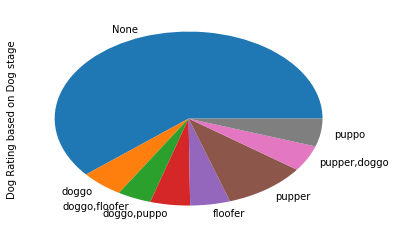

In [332]:
##To get the most popularity for this 2000 Year.
df_master_data.groupby(['dog_stage']).rating_numerator.max().plot(kind='pie',grid=True,label='Dog Rating based on Dog stage')
plt.show()


## Result :
>> Pupper stage of dogs getting more ratings.

## Communication 2:

  ##     1) Top 10 bread of dogs & rating with minimum retweets and likes.
  
  ## Analysis decision :
>>   I have decided to create bar plot to show the results.


In [333]:
df_master_data.retweet_count.min()
##--Sorting with descending order to get the top 10 average highest run time 
df_master_data.sort_values(['retweet_count','favorite_count'], ascending=True,inplace=True)
df_rate_top10 =df_master_data.head(10)
df_rate_top10

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,created_datetime,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,Dog_Name,dog_stage,jpg_url,img_num,dog_breed_type,retweet_count,favorite_count
1042,666102155909144576,0,0,2015-11-16 03:55:04,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,0,0,NaN,https://twitter.com/dog_rates/status/666102155...,11.0,10,None,None,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,English_setter,12,80
1037,667044094246576128,0,0,2015-11-18 18:17:59,"<a href=""http://twitter.com/download/iphone"" r...",12/10 gimme now https://t.co/QZAnwgnOMB,0,0,NaN,https://twitter.com/dog_rates/status/667044094...,12.0,10,None,None,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,1,golden_retriever,51,185
1017,668567822092664832,0,0,2015-11-22 23:12:44,"<a href=""http://twitter.com/download/iphone"" r...",This is Marvin. He can tie a bow tie better th...,0,0,NaN,https://twitter.com/dog_rates/status/668567822...,11.0,10,MNonervin,None,https://pbs.twimg.com/media/CUc64knWoAkZt70.jpg,1,Shih-Tzu,57,249
1035,667160273090932737,0,0,2015-11-19 01:59:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradlay. He is a Ronaldinho Matsuyama ...,0,0,NaN,https://twitter.com/dog_rates/status/667160273...,11.0,10,BrNonedlNoney,None,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,62,259
1024,667832474953625600,0,0,2015-11-20 22:30:44,"<a href=""http://twitter.com/download/iphone"" r...",THE EYES 12/10\n\nI'm sorry. These are suppose...,0,0,NaN,https://twitter.com/dog_rates/status/667832474...,12.0,10,None,None,https://pbs.twimg.com/media/CUSeGFNW4AAyyHC.jpg,1,miniature_pinscher,63,293
1041,666273097616637952,0,0,2015-11-16 15:14:19,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,0,0,NaN,https://twitter.com/dog_rates/status/666273097...,11.0,10,None,None,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,76,172
1032,667435689202614272,0,0,2015-11-19 20:14:03,"<a href=""http://twitter.com/download/iphone"" r...",Ermergerd 12/10 https://t.co/PQni2sjPsm,0,0,NaN,https://twitter.com/dog_rates/status/667435689...,12.0,10,None,None,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,84,308
1040,666373753744588802,0,0,2015-11-16 21:54:18,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,0,0,NaN,https://twitter.com/dog_rates/status/666373753...,11.0,10,None,None,https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg,1,soft-coated_wheaten_terrier,91,186
1031,667453023279554560,0,0,2015-11-19 21:22:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Cupcake. I would do unspeakable things fo...,0,0,NaN,https://twitter.com/dog_rates/status/667453023...,11.0,10,CupcNoneke,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,91,315
1038,666826780179869698,0,0,2015-11-18 03:54:28,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,0,0,NaN,https://twitter.com/dog_rates/status/666826780...,12.0,10,None,None,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese_dog,97,255


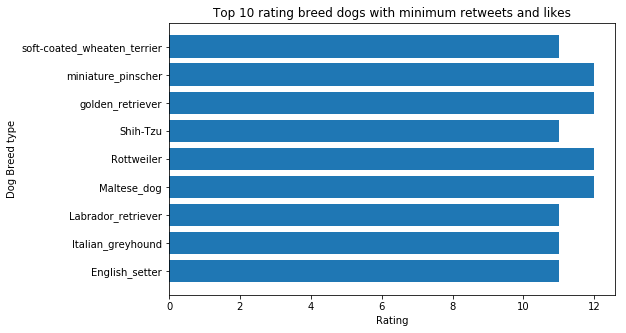

In [334]:
plt.subplots(figsize=(8, 5))
plt.barh(df_rate_top10.dog_breed_type, df_rate_top10.rating_numerator)
plt.title('Top 10 rating breed dogs with minimum retweets and likes')
plt.xlabel('Rating')
plt.ylabel('Dog Breed type');
plt.ylim=(0, 100)
plt.legend()
plt.show()


## Result :
>> Lrish_setter type of breed dog has high rating with minimal retweets & likes .

## Communication :

  ##     1) Top 5 highest rating dog breed types.
  
  ## Analysis decision :
>>   I have decided to create bar plot to show the results.

In [335]:

##--Sorting with descending order to get the top 10 average highest run time 
df_master_data.sort_values(['rating_denominator'], ascending=False,inplace=True)
df_rate_top5 =df_master_data.head(5)

In [336]:
df_master_data.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,created_datetime,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,Dog_Name,dog_stage,jpg_url,img_num,dog_breed_type,retweet_count,favorite_count
554,758467244762497024,0,0,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,0,0,NaN,https://twitter.com/dog_rates/status/758467244...,165.0,150,None,None,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_retriever,2413,5094
853,684225744407494656,684222868335505408,4196983835,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",0,0,NaN,https://twitter.com/dog_rates/status/684225744...,143.0,130,None,None,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2,golden_retriever,228,1301
897,677716515794329600,0,0,2015-12-18 05:06:23,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,0,0,NaN,https://twitter.com/dog_rates/status/677716515...,144.0,120,None,None,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,1,chow,1027,3180
854,684222868335505415,0,0,2016-01-05 04:00:18,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,0,0,NaN,https://twitter.com/dog_rates/status/684222868...,121.0,110,None,None,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,1475,4044
688,713900603437621249,0,0,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,0,0,NaN,https://twitter.com/dog_rates/status/713900603...,99.0,90,None,None,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,1,golden_retriever,789,2965


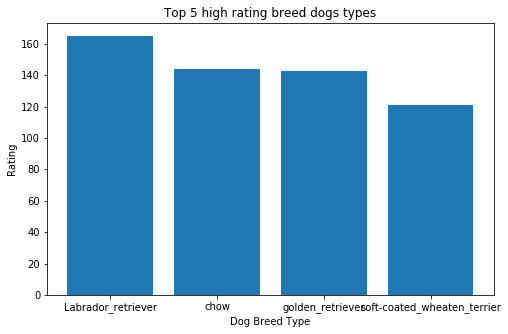

In [337]:
plt.subplots(figsize=(8, 5))
plt.bar(df_rate_top5.dog_breed_type, df_rate_top5.rating_numerator)
plt.title('Top 5 high rating breed dogs types')
plt.xlabel('Dog Breed Type')
plt.ylabel('Rating');
plt.ylim=(0, 100)
plt.legend()
plt.show()

# Results .
Larbrador_retriever type of dogs is a highest rating dogs.



## Communication :

  ##     1) Tweet favorites & reTweet .
  
  ## Analysis decision :
>>   I have decided to create scatter plot to show the results.

Text(0.5,1,'Retweets and favorites Scatter plot')

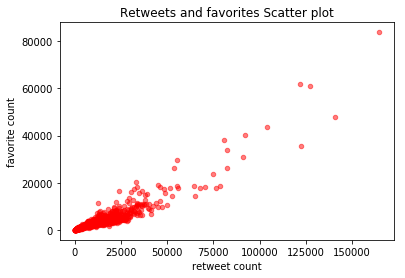

In [338]:
df_master_data.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.5, color = 'red')
plt.xlabel('retweet count')
plt.ylabel('favorite count')
plt.title('Retweets and favorites Scatter plot')

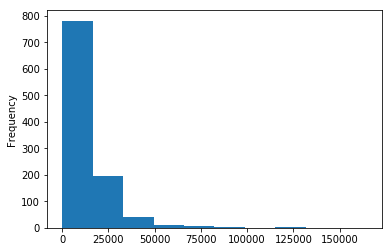

In [339]:
#To draw a hist diagram to find favorite_count numarical column values
df_master_data.favorite_count.plot(kind='hist');


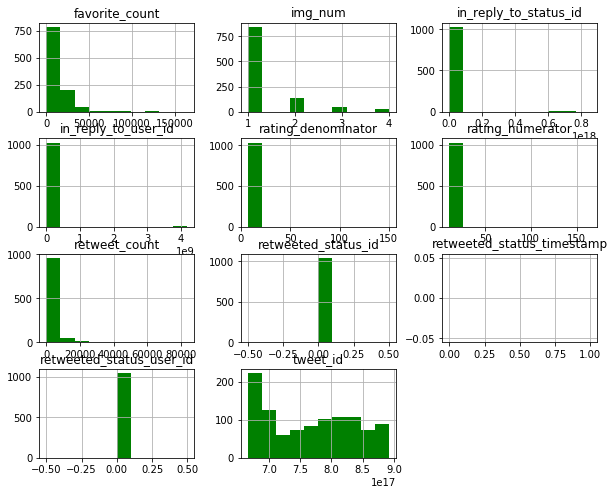

In [340]:
#To draw a hist diagram to find all the numarical column values.
df_master_data.hist(figsize=(10,8),color='green');

In [341]:
df_master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 554 to 342
Data columns (total 19 columns):
tweet_id                      1043 non-null int64
in_reply_to_status_id         1043 non-null int64
in_reply_to_user_id           1043 non-null int64
created_datetime              1043 non-null object
source                        1043 non-null object
text                          1043 non-null object
retweeted_status_id           1043 non-null int64
retweeted_status_user_id      1043 non-null int64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1043 non-null object
rating_numerator              1043 non-null float64
rating_denominator            1043 non-null int64
Dog_Name                      1043 non-null object
dog_stage                     1043 non-null object
jpg_url                       1043 non-null object
img_num                       1043 non-null int64
dog_breed_type                1043 non-null object
retweet_count                 104